In [1]:
import matplotlib.pyplot as plt
from torchsummary import summary
from dataloader import get_data_loader
from utils import get_train_parameters, get_misclassified, classes_dict
from train import train, train_losses, train_acc
from test import test, test_losses, test_acc
import numpy as np

In [2]:
num_epochs = 20
batch_size = 128

In [3]:
train_loader, test_loader = get_data_loader(batch_size)

Files already downloaded and verified
Files already downloaded and verified


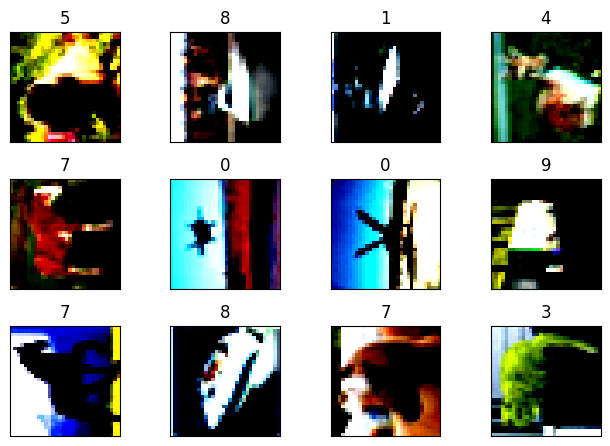

In [8]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow((batch_data[i].squeeze(0).T), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

**Batch Normalization Model**

In [9]:
model, device, optimizer, scheduler, criterion = get_train_parameters(norm="bn")
summary(model, input_size=(3, 32, 32))

Adjusting learning rate of group 0 to 1.0000e-02.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
             ReLU-12           [-1, 16, 16, 16]               0
      BatchNorm2d-13           [-1, 16, 16, 16]      

In [10]:
#Iterate over each epoch and calculate test accuracy after each epoch
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=1.2943 Batch_id=390 Accuracy=44.30: 100%|██████████| 391/391 [00:46<00:00,  8.37it/s]


Test set: Average loss: 1.3300, Accuracy: 5155/10000 (51.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.0260 Batch_id=390 Accuracy=58.92: 100%|██████████| 391/391 [00:51<00:00,  7.63it/s]


Test set: Average loss: 1.0955, Accuracy: 6069/10000 (60.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.9349 Batch_id=390 Accuracy=63.61: 100%|██████████| 391/391 [00:43<00:00,  9.04it/s]


Test set: Average loss: 1.0013, Accuracy: 6397/10000 (63.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.8871 Batch_id=390 Accuracy=66.73: 100%|██████████| 391/391 [00:43<00:00,  8.96it/s]


Test set: Average loss: 0.9508, Accuracy: 6663/10000 (66.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.8204 Batch_id=390 Accuracy=68.51: 100%|██████████| 391/391 [00:42<00:00,  9.20it/s]


Test set: Average loss: 0.8936, Accuracy: 6891/10000 (68.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.7599 Batch_id=390 Accuracy=70.40: 100%|██████████| 391/391 [00:42<00:00,  9.20it/s]


Test set: Average loss: 0.8672, Accuracy: 6920/10000 (69.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.6932 Batch_id=390 Accuracy=73.67: 100%|██████████| 391/391 [00:41<00:00,  9.34it/s]


Test set: Average loss: 0.7393, Accuracy: 7388/10000 (73.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.6990 Batch_id=390 Accuracy=74.58: 100%|██████████| 391/391 [00:43<00:00,  9.03it/s]


Test set: Average loss: 0.7429, Accuracy: 7384/10000 (73.84%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.5312 Batch_id=390 Accuracy=74.87: 100%|██████████| 391/391 [00:41<00:00,  9.34it/s]


Test set: Average loss: 0.7299, Accuracy: 7423/10000 (74.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.7504 Batch_id=390 Accuracy=75.00: 100%|██████████| 391/391 [00:42<00:00,  9.29it/s]


Test set: Average loss: 0.7308, Accuracy: 7434/10000 (74.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.6096 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [00:42<00:00,  9.18it/s]


Test set: Average loss: 0.7284, Accuracy: 7456/10000 (74.56%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.6613 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:42<00:00,  9.26it/s]


Test set: Average loss: 0.7284, Accuracy: 7458/10000 (74.58%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.7229 Batch_id=390 Accuracy=76.11: 100%|██████████| 391/391 [00:42<00:00,  9.28it/s]


Test set: Average loss: 0.7216, Accuracy: 7474/10000 (74.74%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.6926 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:43<00:00,  9.08it/s]


Test set: Average loss: 0.7214, Accuracy: 7482/10000 (74.82%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.6981 Batch_id=390 Accuracy=75.97: 100%|██████████| 391/391 [00:41<00:00,  9.33it/s]


Test set: Average loss: 0.7130, Accuracy: 7504/10000 (75.04%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.5532 Batch_id=390 Accuracy=76.00: 100%|██████████| 391/391 [00:42<00:00,  9.26it/s]


Test set: Average loss: 0.7160, Accuracy: 7489/10000 (74.89%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.6374 Batch_id=390 Accuracy=76.20: 100%|██████████| 391/391 [00:42<00:00,  9.29it/s]


Test set: Average loss: 0.7115, Accuracy: 7520/10000 (75.20%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.7240 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [00:42<00:00,  9.29it/s]


Test set: Average loss: 0.7129, Accuracy: 7504/10000 (75.04%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=0.6749 Batch_id=390 Accuracy=76.04: 100%|██████████| 391/391 [00:42<00:00,  9.26it/s]


Test set: Average loss: 0.7134, Accuracy: 7505/10000 (75.05%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=0.6586 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:43<00:00,  9.06it/s]


Test set: Average loss: 0.7200, Accuracy: 7477/10000 (74.77%)

Adjusting learning rate of group 0 to 1.0000e-05.


Text(0.5, 1.0, 'Test Accuracy')

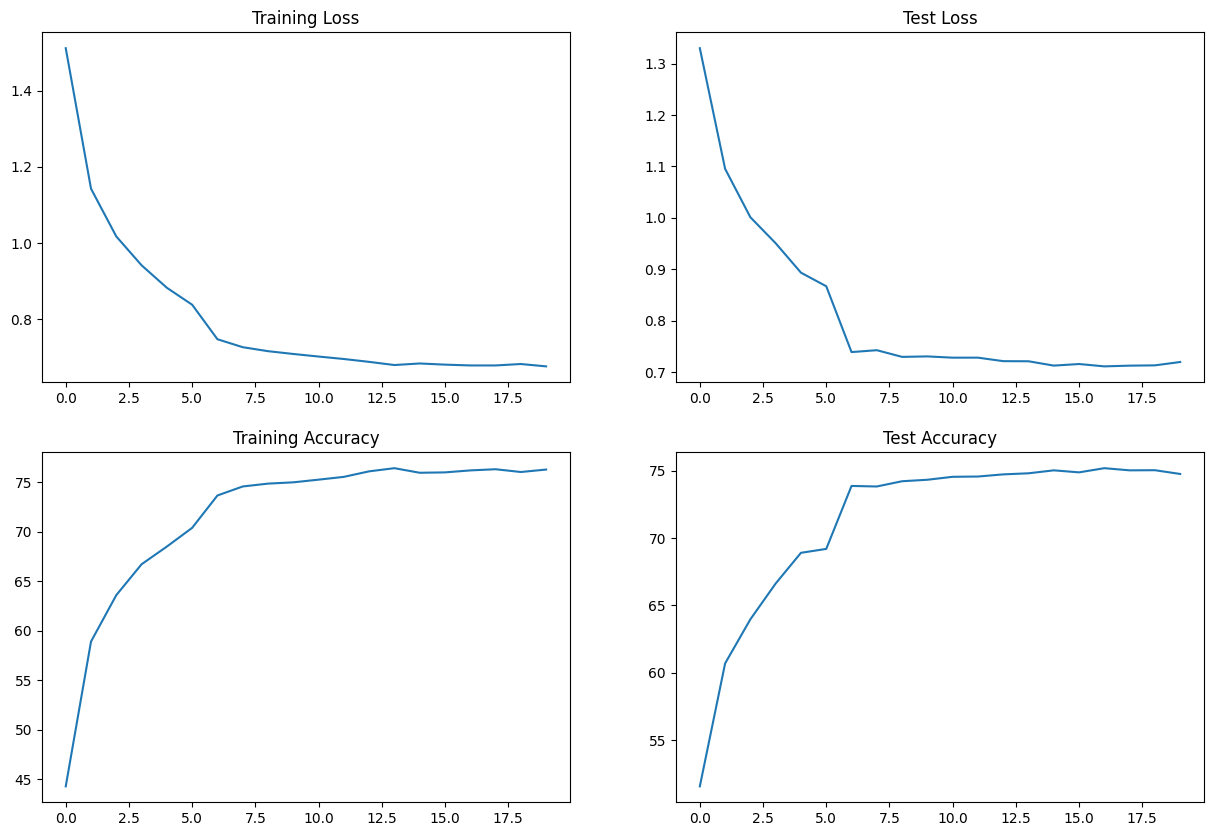

In [13]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

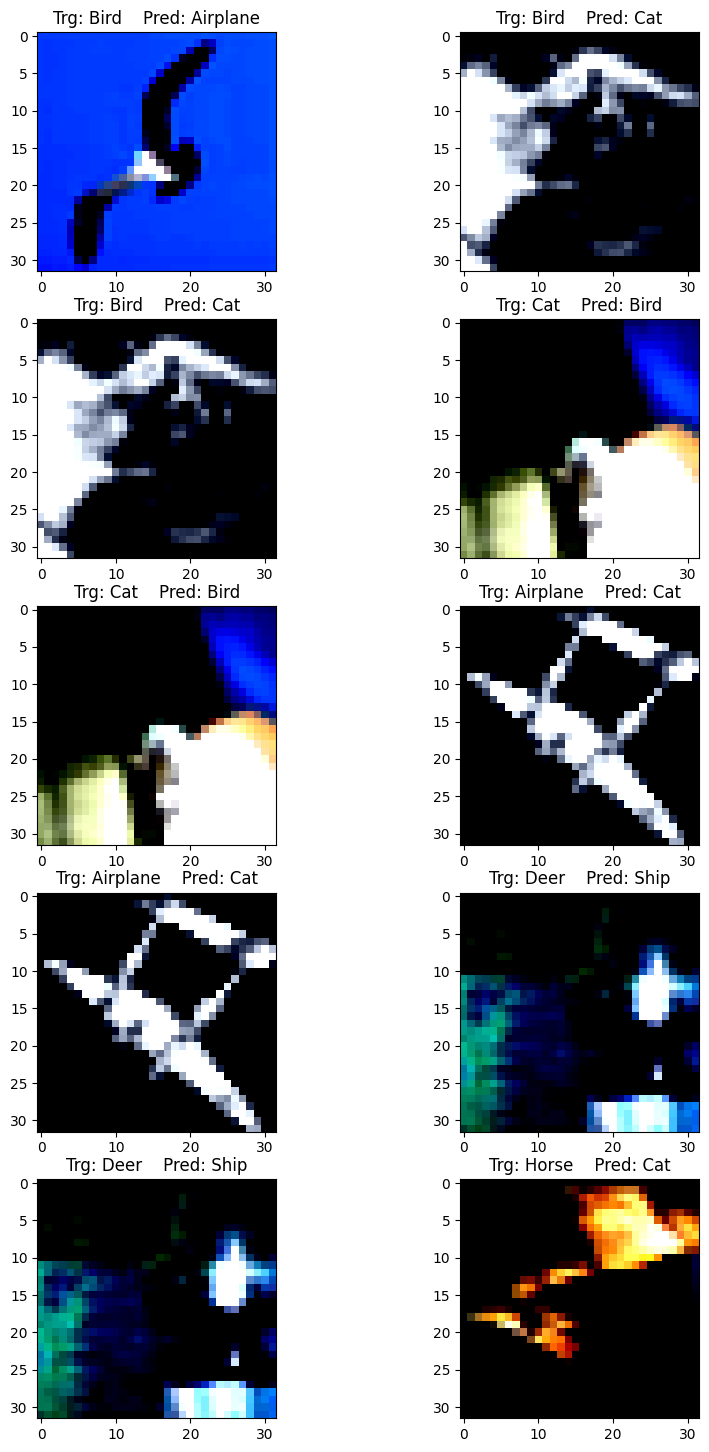

In [16]:
img, trs, prs = get_misclassified(model, device, test_loader, n = 10)
f, axarr = plt.subplots(5,2, figsize=(10, 18))
for i in range(0,5):
  for j in range(0,2):
    axarr[i,j].imshow(img[i+j].cpu().T)
    tr_class = classes_dict[trs[i+j].item()]
    pred_class = classes_dict[prs[i+j].item()]
    axarr[i,j].set_title("Trg: "+str(tr_class) + "    Pred: "+str(pred_class))

**Group Normalization Model**

In [17]:
model, device, optimizer, scheduler, criterion = get_train_parameters(norm="gn")
summary(model, input_size=(3, 32, 32))

Adjusting learning rate of group 0 to 1.0000e-02.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]      

In [18]:
#Iterate over each epoch and calculate test accuracy after each epoch
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=1.3498 Batch_id=390 Accuracy=39.21: 100%|██████████| 391/391 [00:50<00:00,  7.68it/s]


Test set: Average loss: 1.3586, Accuracy: 5037/10000 (50.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.0315 Batch_id=390 Accuracy=54.17: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Test set: Average loss: 1.0943, Accuracy: 6060/10000 (60.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.9779 Batch_id=390 Accuracy=60.54: 100%|██████████| 391/391 [00:43<00:00,  8.97it/s]


Test set: Average loss: 1.0180, Accuracy: 6356/10000 (63.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.8471 Batch_id=390 Accuracy=64.26: 100%|██████████| 391/391 [00:42<00:00,  9.22it/s]


Test set: Average loss: 0.9351, Accuracy: 6681/10000 (66.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.0674 Batch_id=390 Accuracy=66.83: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]


Test set: Average loss: 0.9385, Accuracy: 6706/10000 (67.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.8233 Batch_id=390 Accuracy=68.85: 100%|██████████| 391/391 [00:42<00:00,  9.15it/s]


Test set: Average loss: 0.8384, Accuracy: 7077/10000 (70.77%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.9853 Batch_id=390 Accuracy=72.71: 100%|██████████| 391/391 [00:43<00:00,  8.93it/s]


Test set: Average loss: 0.7798, Accuracy: 7277/10000 (72.77%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.5358 Batch_id=390 Accuracy=73.22: 100%|██████████| 391/391 [00:42<00:00,  9.14it/s]


Test set: Average loss: 0.7744, Accuracy: 7263/10000 (72.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.5582 Batch_id=390 Accuracy=73.97: 100%|██████████| 391/391 [00:43<00:00,  8.99it/s]


Test set: Average loss: 0.7740, Accuracy: 7263/10000 (72.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.6723 Batch_id=390 Accuracy=73.95: 100%|██████████| 391/391 [00:44<00:00,  8.86it/s]


Test set: Average loss: 0.7557, Accuracy: 7388/10000 (73.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.6026 Batch_id=390 Accuracy=74.23: 100%|██████████| 391/391 [00:42<00:00,  9.15it/s]


Test set: Average loss: 0.7519, Accuracy: 7404/10000 (74.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.9181 Batch_id=390 Accuracy=74.27: 100%|██████████| 391/391 [00:42<00:00,  9.14it/s]


Test set: Average loss: 0.7621, Accuracy: 7351/10000 (73.51%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.6601 Batch_id=390 Accuracy=75.03: 100%|██████████| 391/391 [00:42<00:00,  9.24it/s]


Test set: Average loss: 0.7468, Accuracy: 7403/10000 (74.03%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.6916 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:43<00:00,  8.90it/s]


Test set: Average loss: 0.7471, Accuracy: 7396/10000 (73.96%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.6866 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:44<00:00,  8.86it/s]


Test set: Average loss: 0.7471, Accuracy: 7396/10000 (73.96%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.6595 Batch_id=390 Accuracy=75.03: 100%|██████████| 391/391 [00:43<00:00,  8.97it/s]


Test set: Average loss: 0.7422, Accuracy: 7434/10000 (74.34%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.9440 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:42<00:00,  9.10it/s]


Test set: Average loss: 0.7436, Accuracy: 7410/10000 (74.10%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.5805 Batch_id=390 Accuracy=75.04: 100%|██████████| 391/391 [00:42<00:00,  9.21it/s]


Test set: Average loss: 0.7431, Accuracy: 7403/10000 (74.03%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=0.5470 Batch_id=390 Accuracy=75.42: 100%|██████████| 391/391 [00:43<00:00,  8.96it/s]


Test set: Average loss: 0.7434, Accuracy: 7414/10000 (74.14%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=0.7209 Batch_id=390 Accuracy=75.18: 100%|██████████| 391/391 [00:43<00:00,  8.92it/s]


Test set: Average loss: 0.7431, Accuracy: 7416/10000 (74.16%)

Adjusting learning rate of group 0 to 1.0000e-05.


Text(0.5, 1.0, 'Test Accuracy')

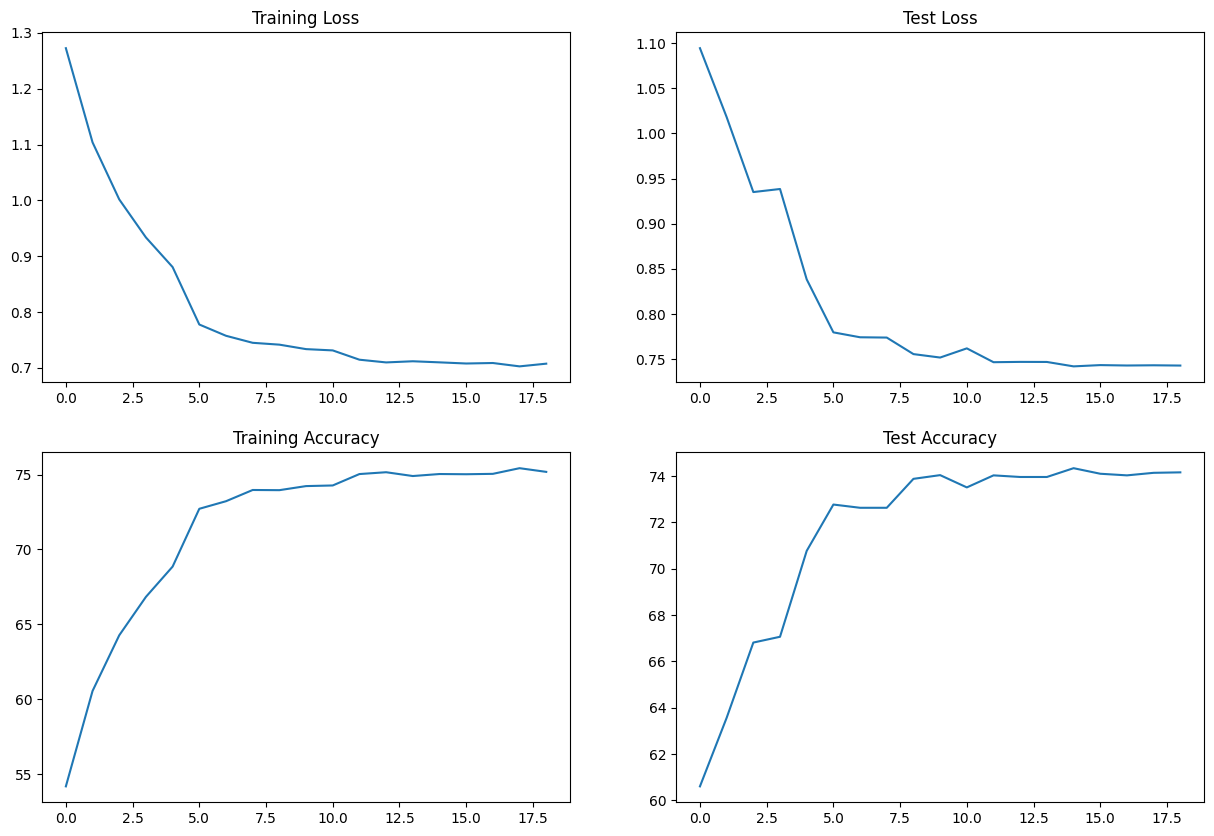

In [29]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses[21:40])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[21:40])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses[21:40])
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc[21:40])
axs[1, 1].set_title("Test Accuracy")

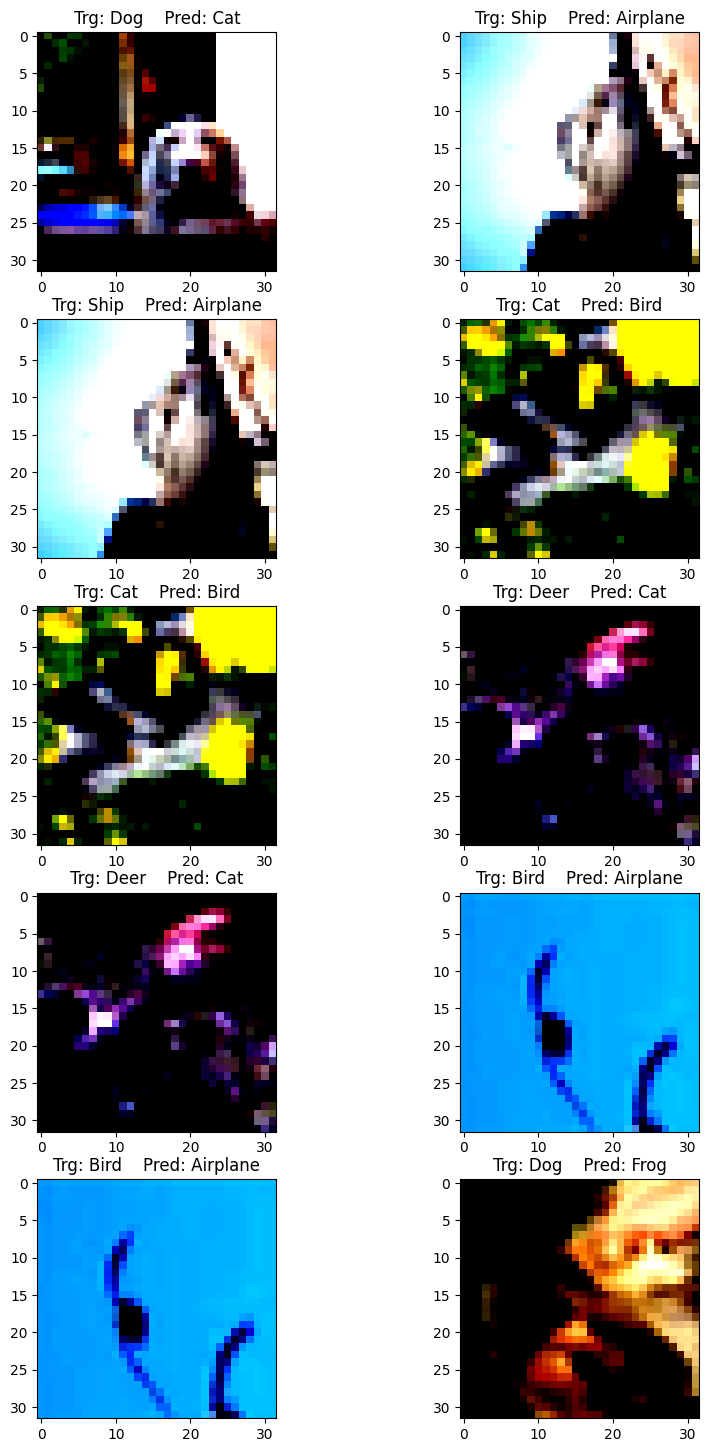

In [20]:
img, trs, prs = get_misclassified(model, device, test_loader, n = 10)
f, axarr = plt.subplots(5,2, figsize=(10, 18))
for i in range(0,5):
  for j in range(0,2):
    axarr[i,j].imshow(img[i+j].cpu().T)
    tr_class = classes_dict[trs[i+j].item()]
    pred_class = classes_dict[prs[i+j].item()]
    axarr[i,j].set_title("Trg: "+str(tr_class) + "    Pred: "+str(pred_class))

**Layer Normalization Model**

In [21]:
model, device, optimizer, scheduler, criterion = get_train_parameters(norm="ln")
summary(model, input_size=(3, 32, 32))

Adjusting learning rate of group 0 to 1.0000e-02.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]      

In [22]:
#Iterate over each epoch and calculate test accuracy after each epoch
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=1.2989 Batch_id=390 Accuracy=37.16: 100%|██████████| 391/391 [00:42<00:00,  9.14it/s]


Test set: Average loss: 1.4277, Accuracy: 4896/10000 (48.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.1460 Batch_id=390 Accuracy=53.49: 100%|██████████| 391/391 [00:43<00:00,  8.91it/s]


Test set: Average loss: 1.1305, Accuracy: 5982/10000 (59.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.2306 Batch_id=390 Accuracy=60.21: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 1.0836, Accuracy: 6122/10000 (61.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.1741 Batch_id=390 Accuracy=63.32: 100%|██████████| 391/391 [00:43<00:00,  8.97it/s]


Test set: Average loss: 0.9941, Accuracy: 6466/10000 (64.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.7780 Batch_id=390 Accuracy=65.63: 100%|██████████| 391/391 [00:45<00:00,  8.61it/s]


Test set: Average loss: 0.9193, Accuracy: 6758/10000 (67.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.8327 Batch_id=390 Accuracy=67.32: 100%|██████████| 391/391 [00:43<00:00,  8.93it/s]


Test set: Average loss: 0.9569, Accuracy: 6585/10000 (65.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.8347 Batch_id=390 Accuracy=71.34: 100%|██████████| 391/391 [00:43<00:00,  9.07it/s]


Test set: Average loss: 0.8127, Accuracy: 7088/10000 (70.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.7830 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:44<00:00,  8.81it/s]


Test set: Average loss: 0.8050, Accuracy: 7113/10000 (71.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.6943 Batch_id=390 Accuracy=72.52: 100%|██████████| 391/391 [00:43<00:00,  8.99it/s]


Test set: Average loss: 0.8060, Accuracy: 7092/10000 (70.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.6803 Batch_id=390 Accuracy=72.74: 100%|██████████| 391/391 [00:42<00:00,  9.10it/s]


Test set: Average loss: 0.8013, Accuracy: 7132/10000 (71.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.9341 Batch_id=390 Accuracy=73.02: 100%|██████████| 391/391 [00:44<00:00,  8.85it/s]


Test set: Average loss: 0.7892, Accuracy: 7218/10000 (72.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.7467 Batch_id=390 Accuracy=73.30: 100%|██████████| 391/391 [00:42<00:00,  9.11it/s]


Test set: Average loss: 0.7889, Accuracy: 7181/10000 (71.81%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.7118 Batch_id=390 Accuracy=73.62: 100%|██████████| 391/391 [00:43<00:00,  8.96it/s]


Test set: Average loss: 0.7767, Accuracy: 7218/10000 (72.18%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.8851 Batch_id=390 Accuracy=73.73: 100%|██████████| 391/391 [00:44<00:00,  8.82it/s]


Test set: Average loss: 0.7735, Accuracy: 7242/10000 (72.42%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.7258 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:42<00:00,  9.13it/s]


Test set: Average loss: 0.7723, Accuracy: 7245/10000 (72.45%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.7529 Batch_id=390 Accuracy=74.01: 100%|██████████| 391/391 [00:44<00:00,  8.87it/s]


Test set: Average loss: 0.7725, Accuracy: 7246/10000 (72.46%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.6662 Batch_id=390 Accuracy=73.66: 100%|██████████| 391/391 [00:43<00:00,  9.09it/s]


Test set: Average loss: 0.7709, Accuracy: 7247/10000 (72.47%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.8973 Batch_id=390 Accuracy=74.01: 100%|██████████| 391/391 [00:43<00:00,  8.99it/s]


Test set: Average loss: 0.7699, Accuracy: 7224/10000 (72.24%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=1.0585 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]


Test set: Average loss: 0.7701, Accuracy: 7235/10000 (72.35%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=0.8175 Batch_id=390 Accuracy=74.06: 100%|██████████| 391/391 [00:42<00:00,  9.14it/s]


Test set: Average loss: 0.7704, Accuracy: 7243/10000 (72.43%)

Adjusting learning rate of group 0 to 1.0000e-05.


Text(0.5, 1.0, 'Test Accuracy')

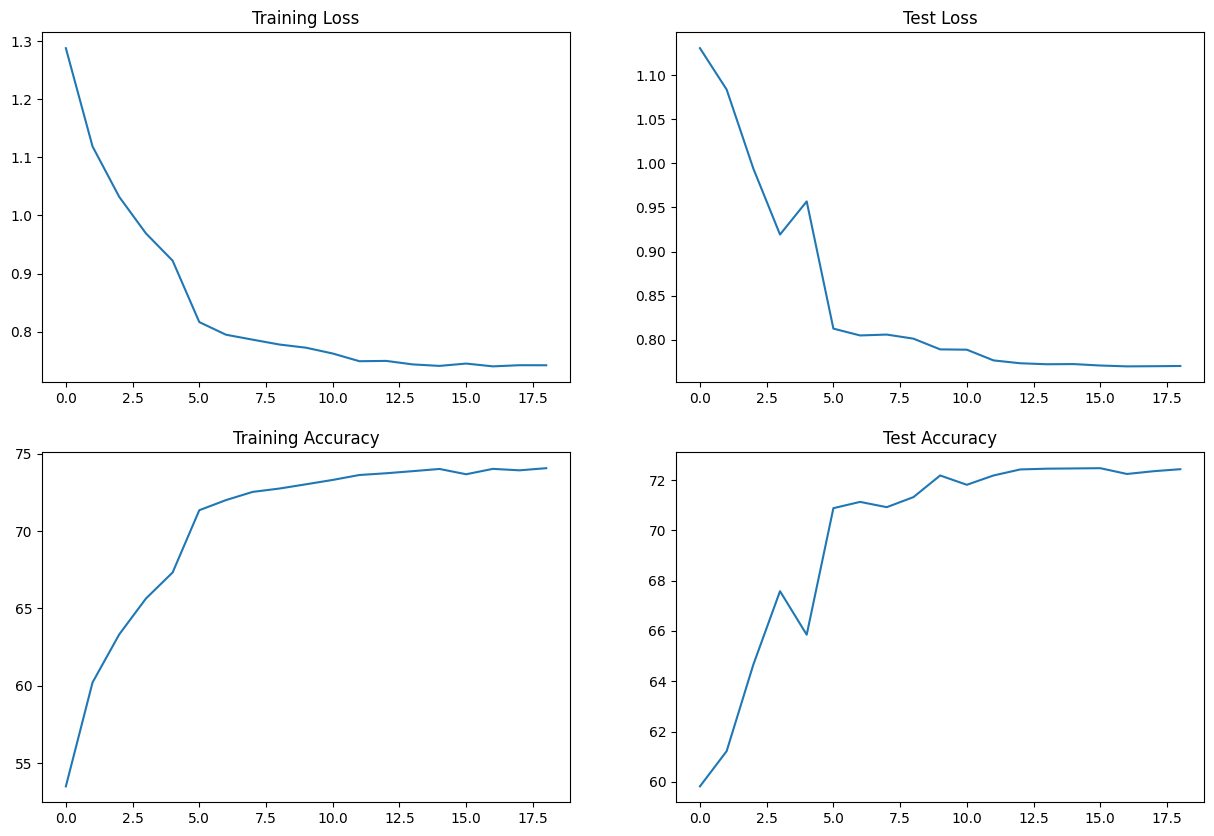

In [25]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses[41:])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[41:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses[41:])
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc[41:])
axs[1, 1].set_title("Test Accuracy")

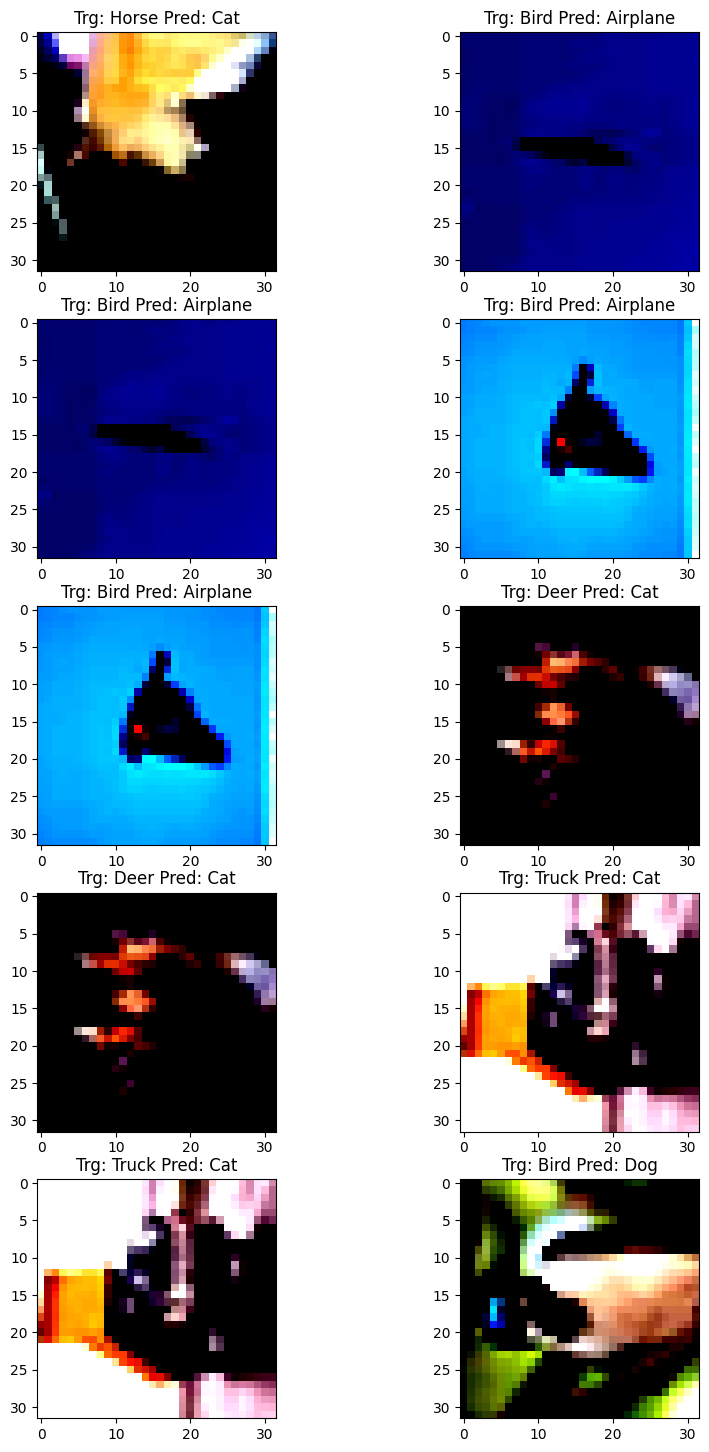

In [26]:
img, trs, prs = get_misclassified(model, device, test_loader, n = 10)
f, axarr = plt.subplots(5,2, figsize=(10, 18))
for i in range(0,5):
  for j in range(0,2):
    axarr[i,j].imshow(img[i+j].cpu().T)
    tr_class = classes_dict[trs[i+j].item()]
    pred_class = classes_dict[prs[i+j].item()]
    axarr[i,j].set_title("Trg: "+str(tr_class) + " Pred: "+str(pred_class))